# Linear Regression 

This code is to help us visualize the linear regression models. <br>
*Due to some time limitations this tutorial is not fully clean and well documented, I apologize for this inconvenience.

This tutorial can be deployed in <a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Coding/linear_regression_class.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Here we define the a dummy linear model,
$$
f(\mathbf{w},x) = a\;x + b
$$
or in a vector notation,
$$
f(\mathbf{w},x) = \begin{bmatrix}
b, & a \end{bmatrix}  \begin{bmatrix}
1 \\
 x \\
\end{bmatrix}
$$

As we will see, the parameters of the linear model, $\mathbf{w}^top=[a,b]$, are *free parameters*. Meaning, we usually use a metric function, commonly named to **loss function**, to search for the **optimal parameters**.<br>

. The loss function measures the distance between the predicted values, $f(x,\mathbf{w})$, and true values, $\hat{y}$,. <br>

For example the square error, 
$$
\epsilon(x_i,\mathbf{w}) = \frac{1}{2}\left (\hat{y}_i - f(x_,\mathbf{w}) \right )^{2} = \frac{1}{2}\left (\hat{y}_i - (a\;x_i + b)) \right )^{2}
$$
the $\frac{1}{2}$ factor only rescales the error between the predicted values and the actual values. (hint: $\frac{d x^2}{d\;x}$).

**Extra**
The square error is not the only possible loss function that one can use. <br>
For example, the absolute error leads to a family of linear models known as [Least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations)
$$
\epsilon(x,\mathbf{w}) = \left | \hat{y}_i - (a\;x + b)) \right |
$$

In [18]:
# when deployed in Colab uncomment this line to install ipyml
#!pip install ipympl

In [29]:
%matplotlib widget 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.tri as tri

In [30]:
def linear_model(a,b,x):
    return a*x + b

In [57]:
x = np.linspace(0, 2, 5)
y = linear_model(2, 1, x) + np.random.uniform(-1, 3,size=x.shape) # add some noise

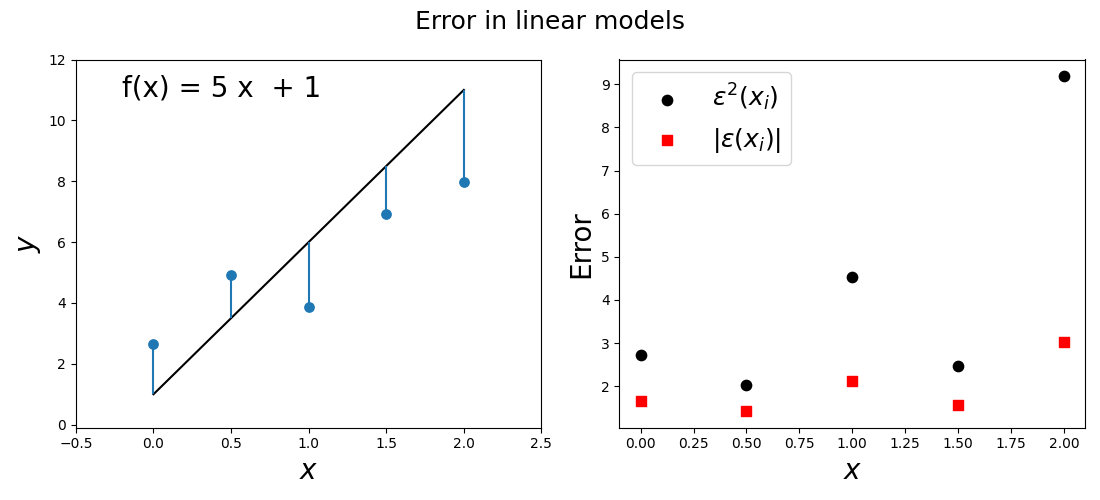

In [65]:
# change the values of a and b and see what happens
a = 5
b = 1

x_grid = np.linspace(0, 2, 100)
y_grid = linear_model(a, b, x_grid)

y_pred = linear_model(a, b, x)
error = y_pred - y

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11,5))
fig.suptitle('Error in linear models',fontsize=18)

# left panel 
ax1.plot(x_grid, y_grid, c='k')
for xi, yi in zip(x, y):
    y_pred_i = linear_model(a, b, xi)
    error_i = yi - y_pred_i
    if error_i > 0:
        ax1.vlines(xi, y_pred_i, y_pred_i + np.abs(error_i))
    else:
        ax1.vlines(xi, y_pred_i - np.abs(error_i), y_pred_i)
ax1.text(0.1, .9, f'f(x) = {a} x  + {b}', fontsize=20, transform=ax1.transAxes)
ax1.scatter(x, y, s=45)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-2, 12)
ax1.set_ylabel(r'$y$', fontsize=20)
ax1.set_xlabel(r'$x$', fontsize=20)

# right panel
sum_errors = 0.
for i,(xi, yi) in enumerate(zip(x, y)):
    y_pred_i = linear_model(a, b, xi)
    error_i = yi - y_pred_i
    sum_errors += error_i**2

    if i == x.shape[0]-1:
        ax2.scatter(xi, error_i**2, color='k', s=55,label=r'$\epsilon^2(x_i)$')
        ax2.scatter(xi, np.abs(error_i), color='r', s=55, marker='s',label=r'$|\epsilon(x_i)|$')   
    else:
        ax2.scatter(xi, error_i**2, color='k', s=55)
        ax2.scatter(xi, np.abs(error_i), color='r', s=55, marker='s')
    
    
# ax2.text(0.1, 0.8, r'$\sum_i^n \epsilon_i^2 = $' + f'{sum_errors:.2f}',
        #  transform=ax2.transAxes, fontsize=16)
ax2.set_ylabel(r'Error', fontsize=20)
ax2.set_xlabel(r'$x$', fontsize=20)

ax1.set_ylim(-0.1,12)
plt.legend(loc=0, fontsize=18)
plt.tight_layout()
plt.savefig('fig_linear_model_errors.png',dpi = 260)

## Mean squared error
From what we can observe, each point give us an error tha estimates how accurate or inaccurate is our model.<br>
Therefore to measure the quality of the the model on the entire collection of data points, **we simply average the individual errors**.<br>
The Mean Squared Error (MSE) is defined as:

$$
{\cal L}(\mathbf{w}) = \frac{1}{n} \sum_{i=i}^{n} \ell_i(\mathbf{w}) = \frac{1}{n} \sum_{i=i}^{n} \frac{1}{2} \left (\hat{y}_i - \mathbf{w}^\top x \right )^2 = \frac{1}{n} \sum_{i=i}^{n} \frac{1}{2} \left (\hat{y}_i - a\;x + b \right )^2,
$$
where $\mathbf{w}$ is $[a,b]$, the parameters of a linear model.

## Optimal model

Finding the optimal model (also known as training in machine learning), meaning the value of $\mathbf{w}$, where ${\cal L}(\mathbf{w})$ has the lowest value. 
$$
\mathbf{w}^* = \argmin_{\mathbf{w}} {\cal L}(\mathbf{w}).
$$

For this lecture, we will use a grid search approach to search for $\mathbf{w}^*$.

In [23]:
def linear_model_total_error(a, b, x,y):
    y_pred = linear_model(a, b, x)
    error = y_pred - y
    error_sqr = error**2
    return 0.5 * np.mean(error_sqr)

Text(0, 0.5, 'Mean Square Error')

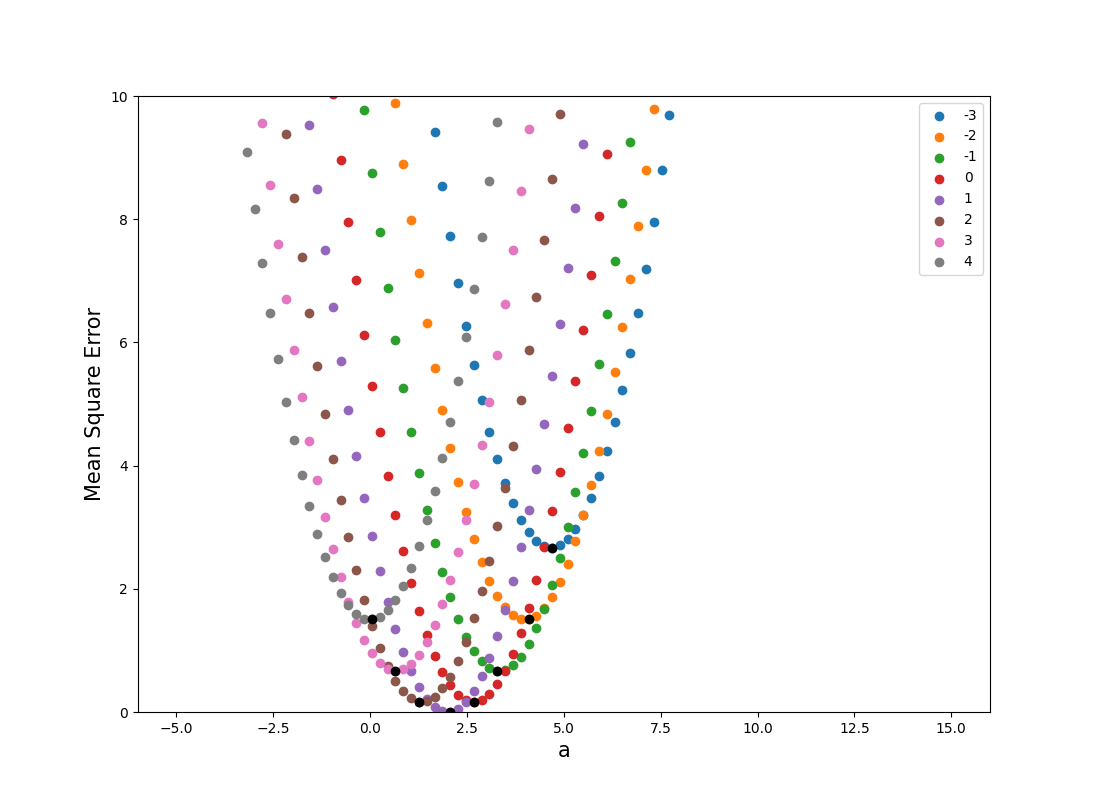

In [24]:
a_grid = np.linspace(-5,15,100)
b_grid = np.arange(-3,5,1)

plt.figure(figsize=(11,8))
for bi in b_grid:
    total_errors = [linear_model_total_error(a, bi, x, y) for a in a_grid]
    total_errors = np.asanyarray(total_errors)
    i0 = np.argmin(total_errors)
    a_best = a_grid[i0]
    plt.scatter(a_grid, total_errors,label=bi)
    plt.scatter(a_best,total_errors[i0],color='k',zorder=2.5)
    
plt.legend()
plt.ylim(0,10)
plt.xlabel('a',fontsize=15)
plt.ylabel('Mean Square Error', fontsize=15)

[1.98989899 1.02020202] 7.652280379553362e-05


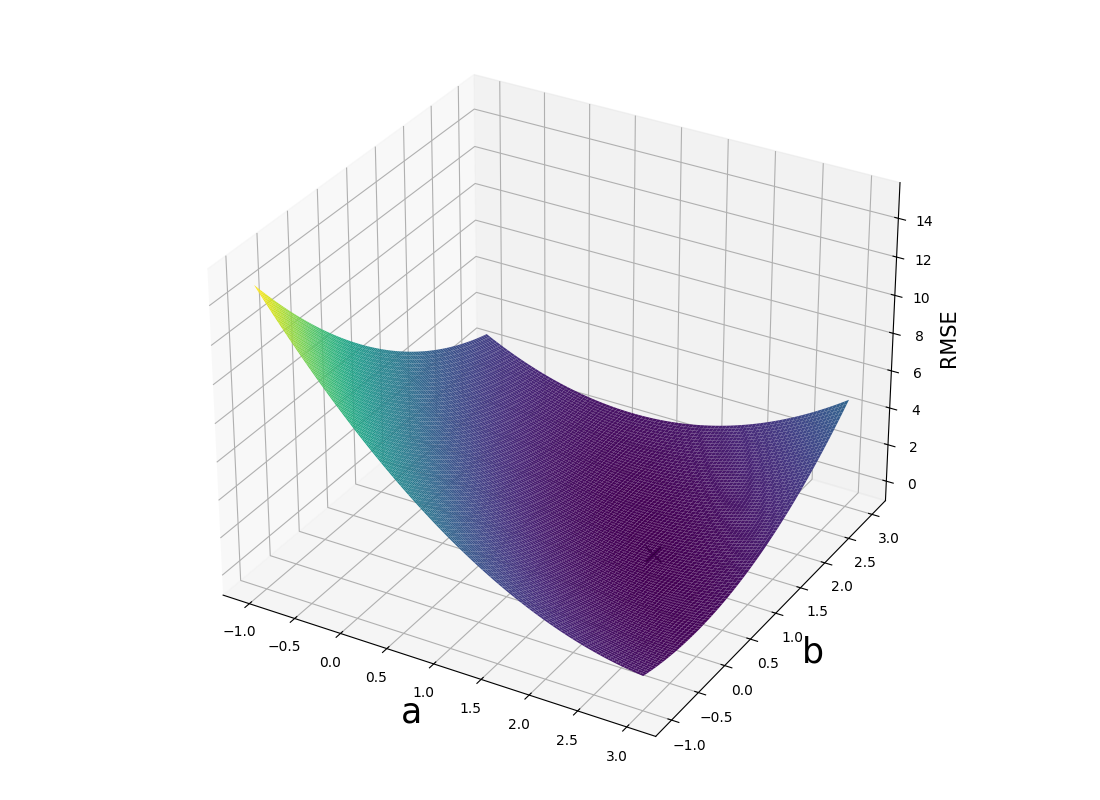

In [25]:
a_grid = np.linspace(-1, 3, 100)
b_grid = np.linspace(-1, 3,  100)
a_, b_ = np.meshgrid(a_grid, b_grid)
a_b = np.column_stack((a_.flatten(), b_.flatten()))

total_error_ = []
for abi in a_b:
    a,b = abi[0],abi[1]
    ei = linear_model_total_error(a, b, x, y)
    total_error_.append(ei)
total_error_ = np.array(total_error_)
i0 = np.argmin(total_error_)

ab_best = a_b[i0]
lowest_error = total_error_[i0]
print(ab_best, lowest_error)
total_error_ = total_error_.reshape(a_.shape)


plt.figure(figsize=(11, 8))
ax = plt.axes(projection='3d')
ax.scatter(ab_best[0], ab_best[1], lowest_error,
           zorder=10, color='k', marker='x', s=125)  # + 1E-3 is only for display
ax.plot_surface(a_, b_, total_error_, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('a',fontsize=25)
ax.set_ylabel('b', fontsize=25)
ax.set_zlabel('RMSE', fontsize=15,rotation=90)
# ax.view_init(elev=30, azim=-120)
plt.tight_layout()

[1.98989899 1.03030303] 0.0002295684113865883


Text(0, 0.5, 'b')

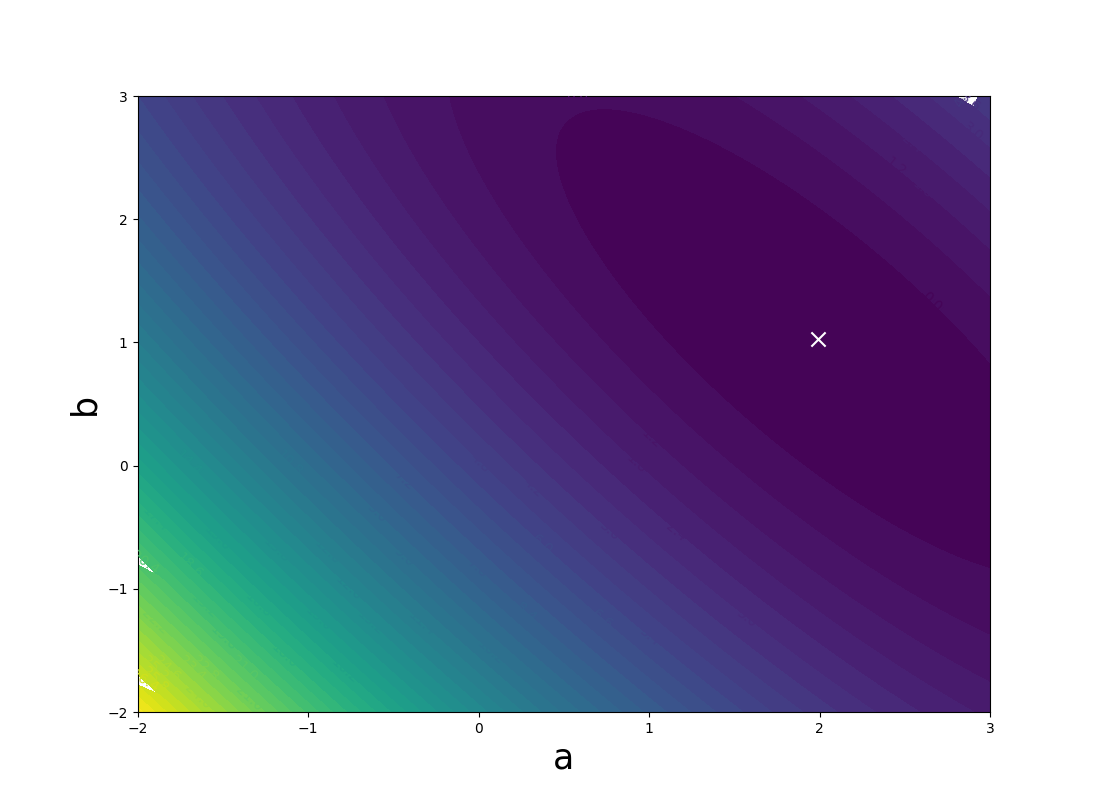

In [26]:
a_grid = np.linspace(-2, 3, 100)
b_grid = np.linspace(-2, 3,  100)
a_, b_ = np.meshgrid(a_grid, b_grid)
a_b = np.column_stack((a_.flatten(), b_.flatten()))

total_error_ = []
for abi in a_b:
    a, b = abi[0], abi[1]
    ei = linear_model_total_error(a, b, x, y)
    total_error_.append(ei)
total_error_ = np.array(total_error_)
i0 = np.argmin(total_error_)

ab_best = a_b[i0]
lowest_error = total_error_[i0]
print(ab_best, lowest_error)
total_error_ = total_error_.reshape(a_.shape)


fig, ax = plt.subplots(figsize=(11, 8))
CS = ax.contourf(a_, b_, total_error_,levels=50)
ax.scatter(ab_best[0], ab_best[1],
           zorder=10, color='w', marker='x', s=105)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel('a', fontsize=25)
ax.set_ylabel('b', fontsize=25)

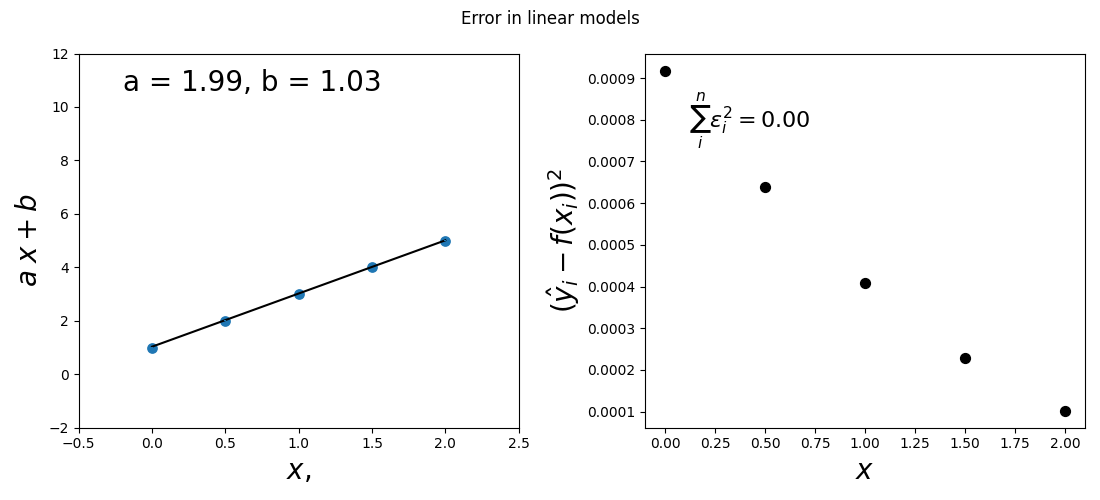

In [27]:
a, b = ab_best[0], ab_best[1]
x_grid = np.linspace(0, 2, 100)
y_grid = linear_model(a, b, x_grid)

y_pred = linear_model(a, b, x)
error = y_pred - y

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
fig.suptitle('Error in linear models')

# left panel
ax1.plot(x_grid, y_grid, c='k')
for xi, yi in zip(x, y):
    y_pred_i = linear_model(a, b, xi)
    error_i = yi - y_pred_i
    if error_i > 0:
        ax1.vlines(xi, y_pred_i, y_pred_i + np.abs(error_i))
    else:
        ax1.vlines(xi, y_pred_i - np.abs(error_i), y_pred_i)
ax1.text(0.1, .9, f'a = {a:.2f}, b = {b:.2f}',
         fontsize=20, transform=ax1.transAxes)
ax1.scatter(x, y, s=45)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-2, 12)
ax1.set_ylabel(r'$a\;x + b$', fontsize=20)
ax1.set_xlabel(r'$x$,', fontsize=20)

# right panel
sum_errors = 0.
for xi, yi in zip(x, y):
    y_pred_i = linear_model(a, b, xi)
    error_i = yi - y_pred_i
    sum_errors += error_i**2

    ax2.scatter(xi, error_i**2, color='k', s=50)
ax2.text(0.1, 0.8, r'$\sum_i^n \epsilon_i^2 = $' + f'{sum_errors:.2f}',
         transform=ax2.transAxes, fontsize=16)
ax2.set_ylabel(r'$(\hat{y}_i - f(x_i))^2$', fontsize=20)
ax2.set_xlabel(r'$x$', fontsize=20)

plt.tight_layout()

## Linear models

We are usually defined linear models as functions, $f(x,\mathbf{w})= a\;x + b$. <br>
However, they can also be defined in terms of matrix-vector multiplication. <br>
Let's assume we have a collection of 10 points and we want to use our linear model for prediction.<br>
We can represent each point as an ``new'' vector to account for the *bias term*.

Let's build the design matrix for these ($\mathbf{X}$) ten points, 
$$
\mathbf{X} = \begin{bmatrix}
\mathbf{x}_{0}^\top \\
\mathbf{x}_{1}^\top \\
 \vdots \\
\mathbf{x}_{10}^\top \\
\end{bmatrix} = \begin{bmatrix}
1 & x_{0} \\
1 & x_{1} \\
 \vdots \\
1 & x_{10} \\
\end{bmatrix}
$$

Prediction with linear models
$$
\underbrace{\mathbf{X}}_{(10,2)} \underbrace{\mathbf{w}}_{(2,1)} = \begin{bmatrix}
\mathbf{x}_{0}^\top \\
\mathbf{x}_{1}^\top \\
 \vdots \\
\mathbf{x}_{10}^\top \\
\end{bmatrix}\begin{bmatrix}
b \\
a \\
\end{bmatrix}= \begin{bmatrix}
1 & x_{0} \\
1 & x_{1} \\
 \vdots \\
1 & x_{10} \\
\end{bmatrix}\begin{bmatrix}
b \\
a \\
\end{bmatrix} = \begin{bmatrix}
b + a\;x_{0} \\
b + a\;x_{1} \\
 \vdots \\
b + a\;x_{10} \\
\end{bmatrix} = \underbrace{\begin{bmatrix}
fx_{0}) \\
f(x_{1}) \\
 \vdots \\
f(x_{10}) \\
\end{bmatrix}}_{(10,1)}
$$


(100, 2)
[[1.         0.        ]
 [1.         0.02020202]
 [1.         0.04040404]
 [1.         0.06060606]
 [1.         0.08080808]
 [1.         0.1010101 ]
 [1.         0.12121212]
 [1.         0.14141414]
 [1.         0.16161616]
 [1.         0.18181818]
 [1.         0.2020202 ]
 [1.         0.22222222]
 [1.         0.24242424]
 [1.         0.26262626]
 [1.         0.28282828]
 [1.         0.3030303 ]
 [1.         0.32323232]
 [1.         0.34343434]
 [1.         0.36363636]
 [1.         0.38383838]
 [1.         0.4040404 ]
 [1.         0.42424242]
 [1.         0.44444444]
 [1.         0.46464646]
 [1.         0.48484848]
 [1.         0.50505051]
 [1.         0.52525253]
 [1.         0.54545455]
 [1.         0.56565657]
 [1.         0.58585859]
 [1.         0.60606061]
 [1.         0.62626263]
 [1.         0.64646465]
 [1.         0.66666667]
 [1.         0.68686869]
 [1.         0.70707071]
 [1.         0.72727273]
 [1.         0.74747475]
 [1.         0.76767677]
 [1.         0.7

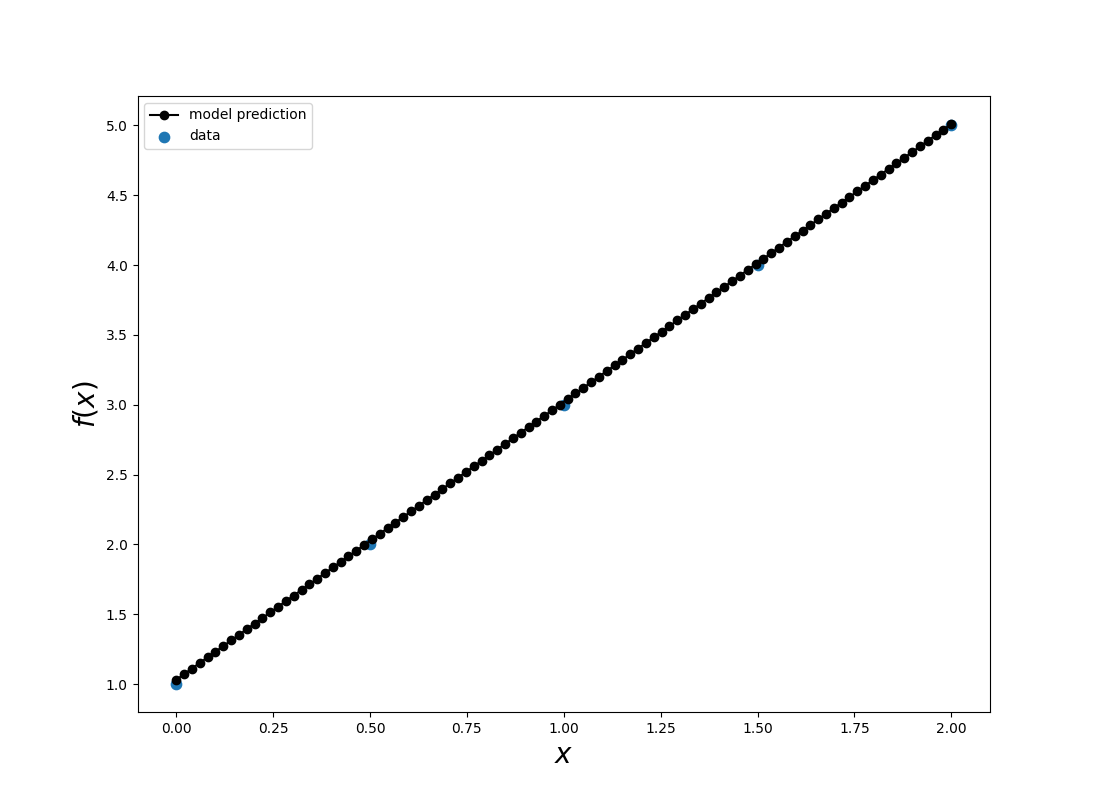

In [28]:
# Build the design matrix

x_grid = np.linspace(-0,2,100) #change the number of points
X = np.column_stack((np.ones_like(x_grid), x_grid))
print(X.shape)
print(X)

# w = ab_best[:,None]
w = np.array([[ab_best[1]],[ab_best[0]]])
print(w.shape)
print(w)

# prediction 
y_pred = X @ w


# plot the result
fig, ax = plt.subplots(figsize=(11, 8))
ax.plot(x_grid, y_pred, c='k', marker='o', label='model prediction')
ax.scatter(x, y,label='data',s=55)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$f(x)$', fontsize=20)
ax.legend()